In [ ]:
# !pip install pyts
# !pip install dtaidistance

In [1]:
import matplotlib.pyplot as plt
import numpy as np

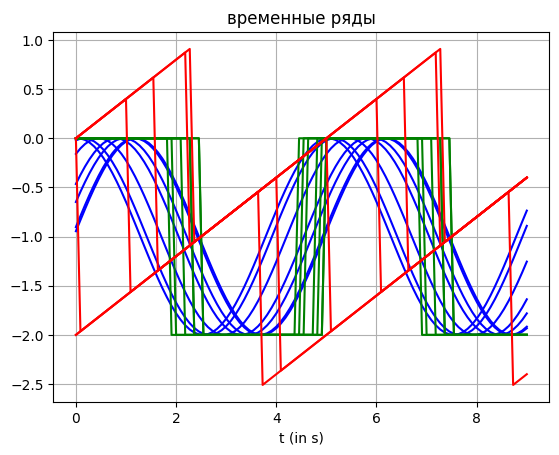

In [9]:
def sine(t, frequency, random):
    """Синусоидальный сигнал"""
    return np.sin(2 * np.pi * frequency * t + 2*random) - 1

def square(t, frequency, random):
    """Квадратный сигнал"""
    return np.sign(np.sin(2 * np.pi * frequency * t + random)) - 1

def sawtooth(t, frequency, random):
    """Пилообразный сигнал"""
    return 2 * (frequency * t - np.floor(0.5 + frequency * t + random))

def generate_time_series(time_index, function, frequency, random):
    """Генерация временного ряда на основе заданной функции"""
    return function(time_index, frequency, random)

time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 7  # количество образцов в каждом типе сигналов
frequency = 0.2
d = np.random.random(size=10)

# Синусоидальный сигнал
for i in range(N):
    tseries_list["Ts" + str(i)] = generate_time_series(time_index, sine, frequency, d[i])

# Квадратный сигнал
for i in range(N):
    tseries_list["Tsq" + str(i)] = generate_time_series(time_index, square, frequency, d[i])

# Пилообразный сигнал
for i in range(N):
    tseries_list["Tst" + str(i)] = generate_time_series(time_index, sawtooth, frequency, d[i])

# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Ts"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tsq"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Tst"+str(i)], '-r')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

In [16]:
from dtaidistance import dtw
from scipy.spatial.distance import euclidean

ts1 = np.abs(tseries_list["Ts1"])
ts4 = np.abs(tseries_list["Ts4"])
print('dtw (Ts1,  Ts4) =', dtw.distance(ts1, ts4))
print('eucl (Ts1,  Ts4) =', euclidean(ts1, ts4), '\n')

tsq2 = np.abs(tseries_list["Tsq2"])
tsq6 = np.abs(tseries_list["Tsq6"])
print('dtw (Tsq2, Tsq6) =', dtw.distance(tsq2, tsq6))
print('eucl (Tsq2, Tsq6) =', euclidean(tsq2, tsq6), '\n')

print('dtw (Tsq2, Ts1) =', dtw.distance(tsq2, ts1))
print('eucl (Tsq2, Ts4) =', euclidean(tsq2, ts4))

dtw (Ts1,  Ts4) = 2.647698370166
eucl (Ts1,  Ts4) = 8.273657518377027 

dtw (Tsq2, Tsq6) = 0.0
eucl (Tsq2, Tsq6) = 8.94427190999916 

dtw (Tsq2, Ts1) = 4.849274386691337
eucl (Tsq2, Ts4) = 6.950224397442393


видно, что dtw оценивает "лучше"

In [17]:
x = []
Y = []

for v in tseries_list:
    if v!= 'Time':
        x.append(tseries_list[v])
        c = v[:-1]
        if c == "Ts":
            Y.append(0)
        elif c == "Tsq":
            Y.append(1)
        else: Y.append(2)


arr = np.arange(len(Y))
np.random.shuffle(arr)

print(Y)

X_train = []
X_test = []
y_train = []
y_test = []

for i in arr[:-5]:
    X_train.append(x[i])
    y_train.append(Y[i])

for i in arr[len(X_train):]:
    X_test.append(x[i])
    y_test.append(Y[i])

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]


In [22]:
from pyts.classification import KNeighborsClassifier


clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 2


In [23]:
from pyts.classification import TimeSeriesForest


clf = TimeSeriesForest(random_state=43)
clf.fit(X_train, y_train)


print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0.086 0.058 0.856]]
Истинный класс для предсказаний 2


In [24]:
from pyts.classification import KNeighborsClassifier


clf = KNeighborsClassifier(metric='dtw')
clf.fit(X_train, y_train)

print(f"Accuracy {clf.score(X_test, y_test)}")
print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[2].reshape(1, -1))}")
print(f"Истинный класс для предсказаний {y_test[2]}")

Accuracy 1.0
Вектор вероятности принадлежности к классам [[0. 0. 1.]]
Истинный класс для предсказаний 2


Везде accuracy == 1, все предсказалось верно